In [1]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as pth_transforms
from PIL import Image
import matplotlib.pyplot as plt
import vision_transformer as vits
import numpy as np

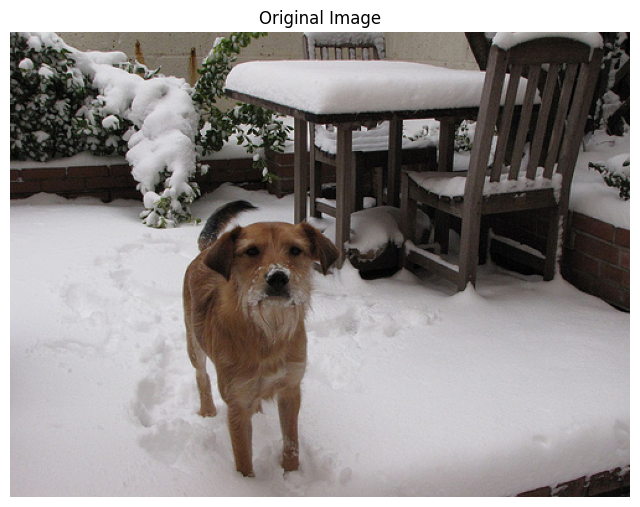

In [2]:
# input image
img = Image.open('dog.JPEG')
img = img.convert('RGB')


plt.figure(figsize=(8, 8))  
plt.imshow(img)  
plt.axis("off") 
plt.title("Original Image")  
plt.show()

In [3]:
# DINO ATTENTION MAPS

if __name__ == '__main__':

    image_size = (480, 480)  
    patch_size = 16  
    output_dir = '.'

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

    model = vits.vit_base(
        patch_size=patch_size,
        num_classes=0 
    )
    model.load_state_dict(torch.load('dino_vitbase16_pretrain.pth'))
    for p in model.parameters():
        p.requires_grad = False
    model.to(device)
    model.eval()

    img = Image.open('dog.JPEG').convert('RGB')
    transform = pth_transforms.Compose([
        pth_transforms.Resize(image_size),
        pth_transforms.ToTensor(),

    ])
    img = transform(img)

    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    attentions = model.get_last_selfattention(img.to(device))  

    nh = attentions.shape[1] 
    attentions = attentions[0, :, 0, :]
    attentions = attentions[:, 1:].reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


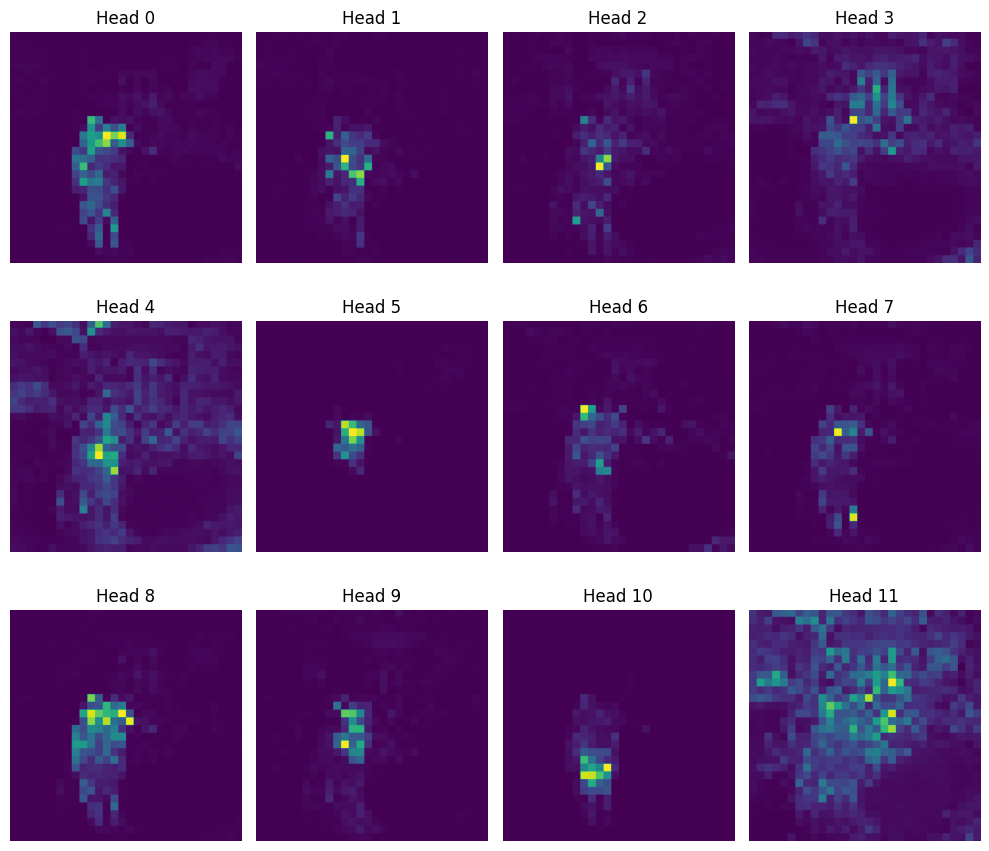

In [4]:

num_cols = 4
num_rows = (nh + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 3))

# Plot all attention maps
for j in range(nh):
    row, col = divmod(j, num_cols)
    ax = axes[row, col]
    ax.imshow(attentions[j], cmap="viridis")
    ax.set_title(f"Head {j}")
    ax.axis("off")

for idx in range(nh, num_rows * num_cols):
    axes[idx // num_cols, idx % num_cols].axis("off")

plt.tight_layout()
plt.show()


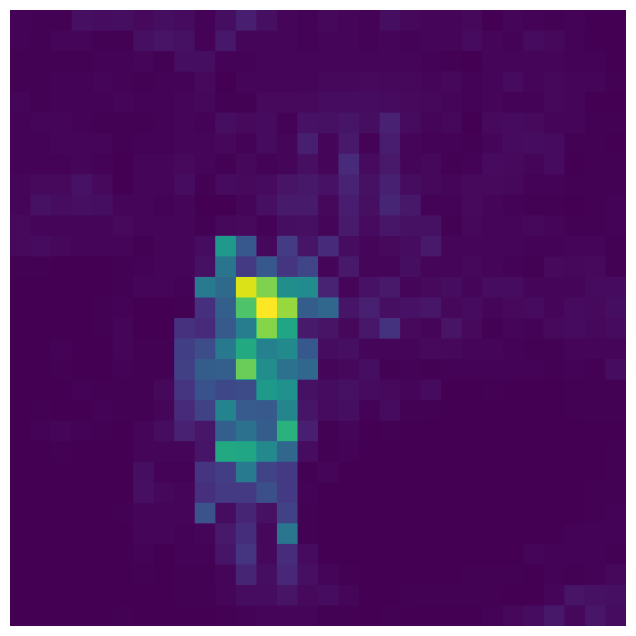

In [7]:
# DINOV2 HEAD NORM

combined_attention = np.linalg.norm(attentions, axis=0)

plt.figure(figsize=(8, 8))
plt.imshow(combined_attention, cmap="viridis")
#plt.title("Combined Attention (Norm of Heads)")
plt.axis("off")
#plt.colorbar(label="Attention Norm")
plt.show()

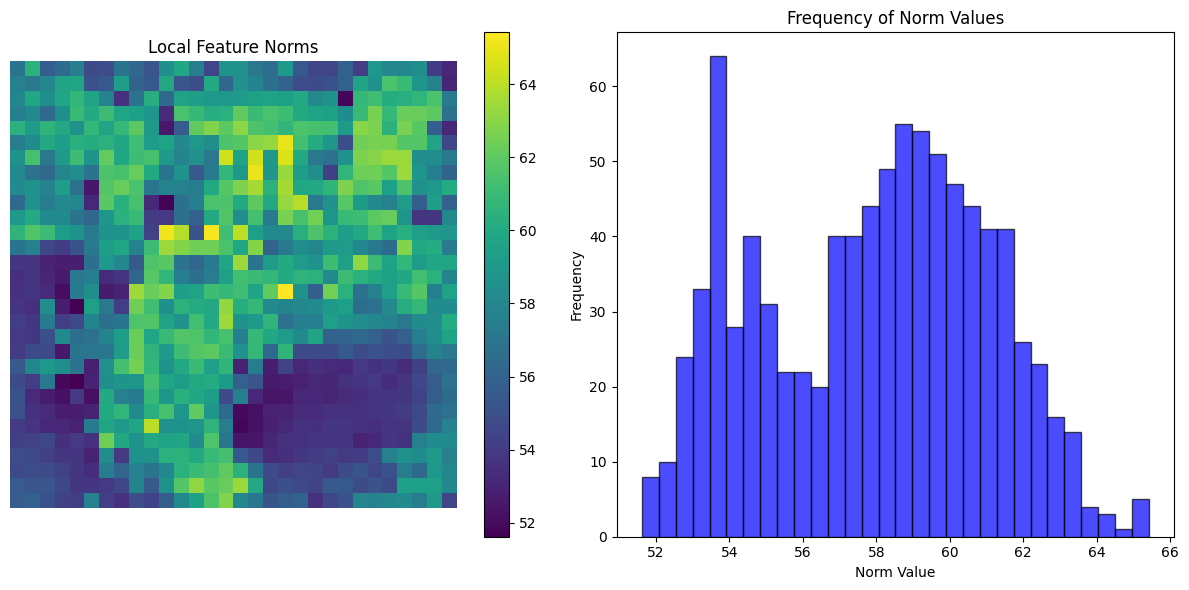

In [6]:
# DINO NORMS 

with torch.no_grad():

    intermediate_features = model.get_intermediate_layers(img.to(device), n=1) 
    patch_features = intermediate_features[-1][:, 1:, :] 

    local_feature_norms = torch.norm(patch_features, dim=-1)

    w_featmap = h_featmap = img.shape[-1] // 16
    local_feature_norms = local_feature_norms.reshape(-1, w_featmap, h_featmap)
    flattened_norms = local_feature_norms[0].cpu().numpy().flatten()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(local_feature_norms[0].cpu().numpy(), cmap="viridis")
    plt.colorbar()
    plt.title("Local Feature Norms")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.hist(flattened_norms, bins=30, color="blue", alpha=0.7, edgecolor="black")
    plt.title("Frequency of Norm Values")
    plt.xlabel("Norm Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()


## ADDITIONAL IMAGE 1

In [2]:
# DINO ATTENTION MAPS

if __name__ == '__main__':

    image_size = (480, 480)  
    patch_size = 16  
    output_dir = '.'

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

    model = vits.vit_base(
        patch_size=patch_size,
        num_classes=0 
    )
    model.load_state_dict(torch.load('dino_vitbase16_pretrain.pth'))
    for p in model.parameters():
        p.requires_grad = False
    model.to(device)
    model.eval()

    img = Image.open('gokart.JPEG').convert('RGB')
    transform = pth_transforms.Compose([
        pth_transforms.Resize(image_size),
        pth_transforms.ToTensor(),

    ])
    img = transform(img)

    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    attentions = model.get_last_selfattention(img.to(device))  

    nh = attentions.shape[1] 
    attentions = attentions[0, :, 0, :]
    attentions = attentions[:, 1:].reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


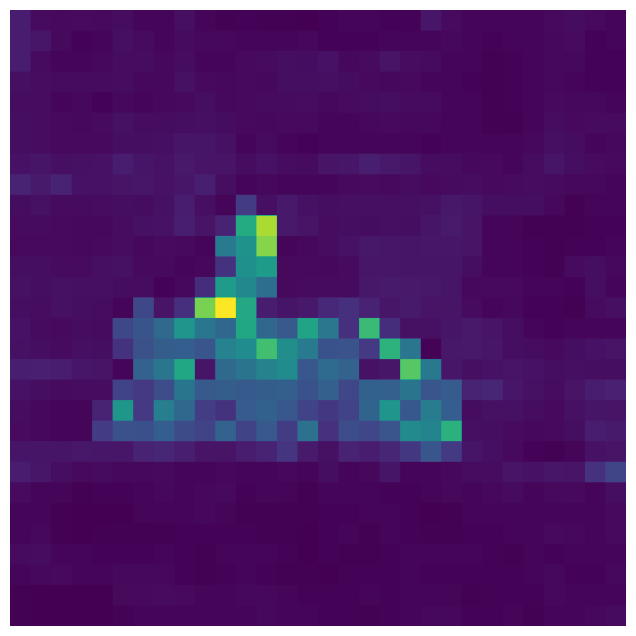

In [3]:
# DINOV2 HEAD NORM

combined_attention = np.linalg.norm(attentions, axis=0)

plt.figure(figsize=(8, 8))
plt.imshow(combined_attention, cmap="viridis")
#plt.title("Combined Attention (Norm of Heads)")
plt.axis("off")
#plt.colorbar(label="Attention Norm")
plt.show()

## ADDITIONAL IMAGE 2

In [4]:
# DINO ATTENTION MAPS

if __name__ == '__main__':

    image_size = (480, 480)  
    patch_size = 16  
    output_dir = '.'

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

    model = vits.vit_base(
        patch_size=patch_size,
        num_classes=0 
    )
    model.load_state_dict(torch.load('dino_vitbase16_pretrain.pth'))
    for p in model.parameters():
        p.requires_grad = False
    model.to(device)
    model.eval()

    img = Image.open('racket.JPEG').convert('RGB')
    transform = pth_transforms.Compose([
        pth_transforms.Resize(image_size),
        pth_transforms.ToTensor(),

    ])
    img = transform(img)

    w, h = img.shape[1] - img.shape[1] % patch_size, img.shape[2] - img.shape[2] % patch_size
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // patch_size
    h_featmap = img.shape[-1] // patch_size

    attentions = model.get_last_selfattention(img.to(device))  

    nh = attentions.shape[1] 
    attentions = attentions[0, :, 0, :]
    attentions = attentions[:, 1:].reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().numpy()

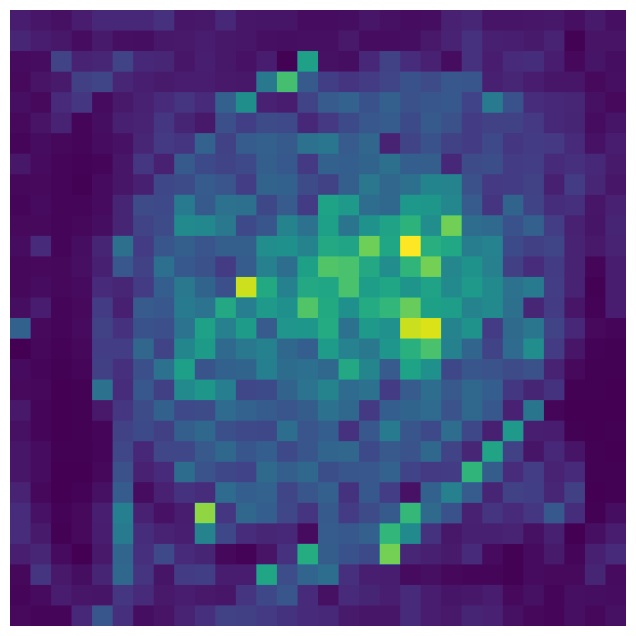

In [5]:
# DINOV2 HEAD NORM

combined_attention = np.linalg.norm(attentions, axis=0)

plt.figure(figsize=(8, 8))
plt.imshow(combined_attention, cmap="viridis")
#plt.title("Combined Attention (Norm of Heads)")
plt.axis("off")
#plt.colorbar(label="Attention Norm")
plt.show()